## This notebook demonstrates how to setup and use the Rainy season Onset Metrics Package (ROMP)  

The quick reference guide include:
- an overview of the package structure and workflow
- an installation guidance document
- a notebook on how to prepare for the config file 
- input data requirement
- how to run the package
- output data example
- metrics included in the package
- examples of metric plots


<br>



### ROMP structure and workflow






<img src="ROMP_structure.png" width="490">

<br>

#### Benchmarking pipeline:  
1. Load configuration  
2. Setup benchmarking cases  
3. Read model and observation data  
4. Detect rainy season onset  
5. Evaluate model against reference  
6. Generate benchmarking metrics  
7. Save metric outputs and figures  
8. Make metric plots  


<br>


## Installation

Follow the instructions in installation guidance [document](https://docs.google.com/document/d/18iatY4sVqlNrUAXQCd-EURKtPfw-ZjNib4RkS-j3-v4/edit?tab=t.homv0v9n1oxi#heading=h.7icx9r87yopj) or [README.md](https://github.com/bosup/MOMP/blob/main/README.md) to install ROMP and link jupyter notebook kernel to your python environment.  

<br>

initialize the notebook for interactive demo

In [ ]:
# import necessary libraries for this demo
from momp.lib.loader import get_cfg
from momp.utils.printing import print_cfg, print_data_info
from momp.utils.printing import tuple_to_str
from pathlib import Path
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

In [11]:
# get to know the local directory where the package is installed
cfg = get_cfg()
base_dir = cfg.base_dir
safe_path = Path(base_dir).expanduser().as_posix().replace(str(Path.home()), "~")
print(f"ROMP package directory is {safe_path}")

Configuration validated!
ROMP package directory is ~/Code/benchmarking/momp


In [28]:
# copy the demo config file to your package
!cp {base_dir}/../demo/et/config_et_prob.in {base_dir}/params/config.in
cfg = get_cfg()

/Users/bodong/Code/benchmarking/momp/../demo/et/config_et_prob.in
__init__.py     config_det.in   config.in
__pycache__     config_india.in region_def.py


python(64463) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(64464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<br>

## Set package configuration & benchmarking parameters

All parameters are set in `params/config.in`  

an example content of a config file 

In [3]:
# full package configurations & benchmarking parameters
config_path = cfg.base_dir.joinpath("params", "config.in")
text = Path(config_path).read_text()
print(text)

# ==============================================================================
# Rainy season Onset Metrics Package (ROMP) Configuration
# Version: 0.0.1
# Description: Workflow configuration for evaluating rainy season onset forecast 
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. CORE STRUCTURE & DIMENSIONS
# ------------------------------------------------------------------------------
project_name = "test ROMP run with demo data"

# Internal benchmarking workflow layout (e.g., dimensions in the processed case).
# Frozen with major ROMP versions
layout = ("model", "verification_window")

# List of models to process (e.g., "AIFS", "IFS", "NGCM").
# Must be in same forecast category, e.g., all probabilistic models
# for all parameters ending in '_list', keep the trailing comma if only one item
# the number of entries in '*_list' should be consistent with 'model_li

<br>

Refer to the [package configuration instructions notebook](package_configuration.ipynb) to prepare for the `config.in`    

<br>

## Data preperation

With where the package base directory in mind, make sure required input data are in designated directories. It is expected that you have access to the demo data in the google cloud bucket, or have downloaded the data to your local disk.


In [3]:
# retrieve input data directories from package configuration 
print_cfg(cfg, ["obs_dir", "ref_model_dir", "model_dir_list"])

obs_dir: ../data/CHIRPS_IMERG
ref_model_dir: ../data/CHIRPS_IMERG
model_dir_list: ('../data/AIFS_ENS', '../data/gencast')



    
required data include  
- **forecast model**  
- **reference model**  
- **observation (ground truth)**

and their filenames should follow certain naming convention as specified in 
`*_file_pattern` parameters in `params/config.in`

such as


In [5]:
# input data naming convention
print_cfg(cfg, "file_pattern")

obs_file_pattern: ('{}.nc',)
ref_model_file_pattern: {}.nc
file_pattern_list: ('{}.nc', '{}.nc')


where the placeholder is to be replaced by year or date string  

for example, 

In [4]:
# model forecast data
model_dir = Path(cfg.model_dir_list[0])
model_name = cfg.model_list[0]
print(f"model = {model_name}")
!ls {model_dir}

model = AIFS_ENS
2019.nc 2020.nc 2021.nc 2022.nc 2023.nc 2024.nc


Acceptable data type can be either `.nc` or `.zarr`  
They must have standard spatiotemporal dimensions including `lat`, `lon`, forecast initialization time `time` or `init_time`, forecast steps as `step` or `day`. Ensemble forecast data are expected to have an additional ensemble dimension as `ensemble`, `member` or `number`.

Valid format and dimensions of the input data (deterministic model) look like:

In [5]:
print_data_info(model_dir)


File: 2021.nc

Dimensions:
  time: 26
  number: 55
  day: 47
  lat: 49
  lon: 61

Variables:
  tp


<br>

## Run the ROMP benchmarking package  

#### ROMP supports two operational modes:
- **Production mode**: Executed via the command line interface (CLI) for standard workflows and automated pipelines.
- **Research mode**: Accessible as an importable Python module, enabling interactive experimentation, analysis, and integration within Python scripts or Jupyter notebooks.  


### 1 - &nbsp;Run ROMP in **production mode**  
With properly configured `config.in`, the main benchmarking workflow is executed via the CLI:               

`momp-run`

Typical steps performed:
1. Load configuration
2. Set up benchmarking cases
3. Read model and observation data
4. Detect rainy season onset
5. Evaluate model against reference data
6. Generate benchmarking metrics
7. Save metric outputs and figures
8. Make metric plots
   
with all parameters and flags properly configured, run ROMP, and pay attention to the runtime console output

In [64]:
! momp-run

package base dir ~/Code/benchmarking/momp
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!

  ____    ___   __  __  ____
 |  _ \  / _ \ |  \/  ||  _ \
 | |_) || | | || |\/| || |_) |
 |  _ < | |_| || |  | ||  __/
 |_| \_\ \___/ |_|  |_||_|

 Rainy season Onset Metrics Package (ROMP)
 Version : 0.0.1

--------------------------------------------------------------------------------
 Project    : test ROMP run with demo data
 Start Time : 2026-02-03T18:30:52
--------------------------------------------------------------------------------

 Initializing analysis pipeline...

2026-02-03 18:30:52 [INFO] Starting ROMP Workflow...
processing IFS onset evaluation for verification window (1, 15), case: IFS_1-15

1. Processing forecast model...
Processing years: (2015,)

--------------------------------------------------
Processing year 2015
Loading S2S model data...
Loading IMD rainfall data...
Detecting observed onset...

<br>
<br>

Users can optionally keep an edited copy of the configuration file outside the sitepackage with job specific filename such as `config_job1.in`, then run ROMP as

```
momp-run -p /path_to/config_job1.in
```

This method only works when running ROMP from the CLI

In [9]:
# example ROMP run with deterministic forecast data
# ! momp-run -p ../demo/data/config_det.in
! momp-run -p ../demo/et/config_et_det.in

package base dir /Users/bodong/Code/benchmarking/momp
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!
Configuration validated!

  ____    ___   __  __  ____
 |  _ \  / _ \ |  \/  ||  _ \
 | |_) || | | || |\/| || |_) |
 |  _ < | |_| || |  | ||  __/
 |_| \_\ \___/ |_|  |_||_|

 Rainy season Onset Metrics Package (ROMP)
 Version : 0.0.1

--------------------------------------------------------------------------------
 Project    : test ROMP run with demo data
 Start Time : 2026-02-03T16:32:49
--------------------------------------------------------------------------------

 Initializing analysis pipeline...

2026-02-03 16:32:49 [INFO] Starting ROMP Workflow...
processing AIFS onset evaluation for verification window (1, 15), case: AIFS_1-15

--------------------------------------------------
Processing year 2015
Extracting model forecast data ...
Computing onset for model forecast ...
Processing 26 init times x 7 lats x 5 lons...

Proces

<br>

The package also supports passing specific parameter values via command-line options for quick sensitivity tests.  

for available CLI parameter and flag options, run `momp-run -h`

In [63]:
! momp-run -h

package base dir ~/Code/benchmarking/momp
usage: momp-run [-h] [--model_list MODEL_LIST [MODEL_LIST ...]]
                [--verification_window_list VERIFICATION_WINDOW_LIST]
                [--max_forecast_day MAX_FORECAST_DAY] [--wet_init WET_INIT]
                [--wet_threshold WET_THRESHOLD] [--wet_spell WET_SPELL]
                [--dry_threshold DRY_THRESHOLD] [--dry_spell DRY_SPELL]
                [--dry_extent DRY_EXTENT]
                [--onset_percentage_threshold ONSET_PERCENTAGE_THRESHOLD]
                [--tolerance_days_list TOLERANCE_DAYS_LIST [TOLERANCE_DAYS_LIST ...]]
                [--day_bins DAY_BINS]
                [--start_date START_DATE START_DATE START_DATE]
                [--end_date END_DATE END_DATE END_DATE]
                [--show_plot SHOW_PLOT] [--show_panel SHOW_PANEL]
                [--probabilistic PROBABILISTIC] [--debug DEBUG]
                [--region REGION]

ROMP Package Parameter Loader

options:
  -h, --help            show this help 

<br>

### 2 - &nbsp;Run ROMP in **Research mode**  
#### Option 1. Invoke the package API as a module  

`python -m momp.app.onset_time_series`  

<br>

#### Option 2. import ROMP as a python package  

`from momp.app.onset_time_series import obs_onset_analysis as ons`  

and then write your own diagnositic code leveraging the `obs_onset_analysis()` functionality

<br>

Here is an example of using `obs_onset_analysis()` for diagnosing rainy season onset at a specific location

Configuration validated!
Configuration validated!

--------------------------------------------------
Processing year 2015

 WARNING - specified region is not in cartopy.io.shapereader
onset time series figure saved to ../demo/et/figure/onset_time_series.png


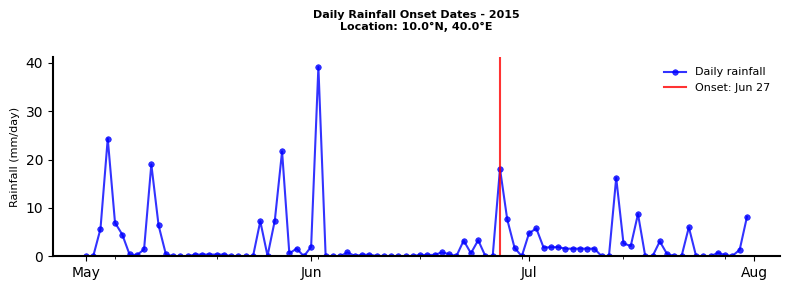

In [6]:
from momp.app.onset_time_series import obs_onset_analysis as ons
_ = ons(year=2015, lat_select=10, lon_select=40, **vars(cfg))

<br>
<br>

## Metric Results

`dir_out` tells where the package output data are located  
spatial metrics are saved in `.nc` files  
domain averaged probabilistic metrics are saved in `.csv` files

In [22]:
# benchmarking output data
dir_out = Path(cfg.dir_out)
print("\nbenchmarking metrics data in --> ", dir_out, "\n")
!ls {dir_out}/*.nc {dir_out}/*.csv


benchmarking metrics data in -->  ../demo/et/output 

../demo/et/output/binned_skill_scores_AIFS_ENS_1-15.csv
../demo/et/output/binned_skill_scores_AIFS_ENS_16-30.csv
../demo/et/output/binned_skill_scores_gencast_1-15.csv
../demo/et/output/binned_skill_scores_gencast_16-30.csv
../demo/et/output/climatology_onset_doy_1998-2024.nc
../demo/et/output/overall_skill_scores_AIFS_ENS_1-15.csv
../demo/et/output/overall_skill_scores_AIFS_ENS_16-30.csv
../demo/et/output/overall_skill_scores_gencast_1-15.csv
../demo/et/output/overall_skill_scores_gencast_16-30.csv
../demo/et/output/spatial_metrics_AIFS_1-15.nc
../demo/et/output/spatial_metrics_AIFS_16-30.nc
../demo/et/output/spatial_metrics_AIFS_ENS_1-15.nc
../demo/et/output/spatial_metrics_climatology_1-15.nc
../demo/et/output/spatial_metrics_climatology_16-30.nc
../demo/et/output/spatial_metrics_gencast_1-15.nc


python(62828) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


<br>

Below is an example of saved binned skill scores from the benckmarking of a probabilistic forecast  


In [8]:
window =  cfg.verification_window_list[0]
# filename = base_dir.joinpath(dir_out, f"binned_skill_scores_{model_name}_{tuple_to_str(window)}.csv")
filename = os.path.join(dir_out, f"binned_skill_scores_{model_name}_{tuple_to_str(window)}.csv")
print("\nloading saved metrics from ", filename, "\n")
df_bins = pd.read_csv(filename)
df_bins


loading saved metrics from  ../demo/et/output/binned_skill_scores_AIFS_ENS_1-15.csv 



,Bin,clean_bins,Fair_Brier_Skill_Score,AUC,AUC_ref,Fair_Brier_Score_Forecast,Fair_Brier_Score_Climatology
0,Days 1-5,1-5,0.006706,0.840818,0.808724,0.093827,0.094460
1,Days 6-10,6-10,-0.367126,0.675719,0.757456,0.142955,0.104566
2,Days 11-15,11-15,-0.433456,0.499765,0.731860,0.140790,0.098217


<br>

metric plots are saved in the output figure folder as defined in `dir_fig`  



In [9]:
# metrics plots
dir_fig = Path(cfg.dir_fig)
print("\nmetrics plots in --> ", dir_fig, "\n")
!ls {dir_fig}


metrics plots in -->  ../demo/et/figure 

onset_time_series.png                   reliability_gencast_1-15.png
panel_bar_BSS_RPSS_AUC_1-15.png         reliability_gencast_16-30.png
panel_bar_BSS_RPSS_AUC_16-30.png        skill_scores_heatmap_AIFS_ENS_1-15.png
panel_portrait_BSS_AUC_1-15.png         skill_scores_heatmap_AIFS_ENS_16-30.png
panel_portrait_BSS_AUC_16-30.png        skill_scores_heatmap_gencast_1-15.png
reliability_AIFS_ENS_1-15.png           skill_scores_heatmap_gencast_16-30.png
reliability_AIFS_ENS_16-30.png


<br>

if `plot_heatmap` is set to `True`, it plots a heatmap of BSS and AUC

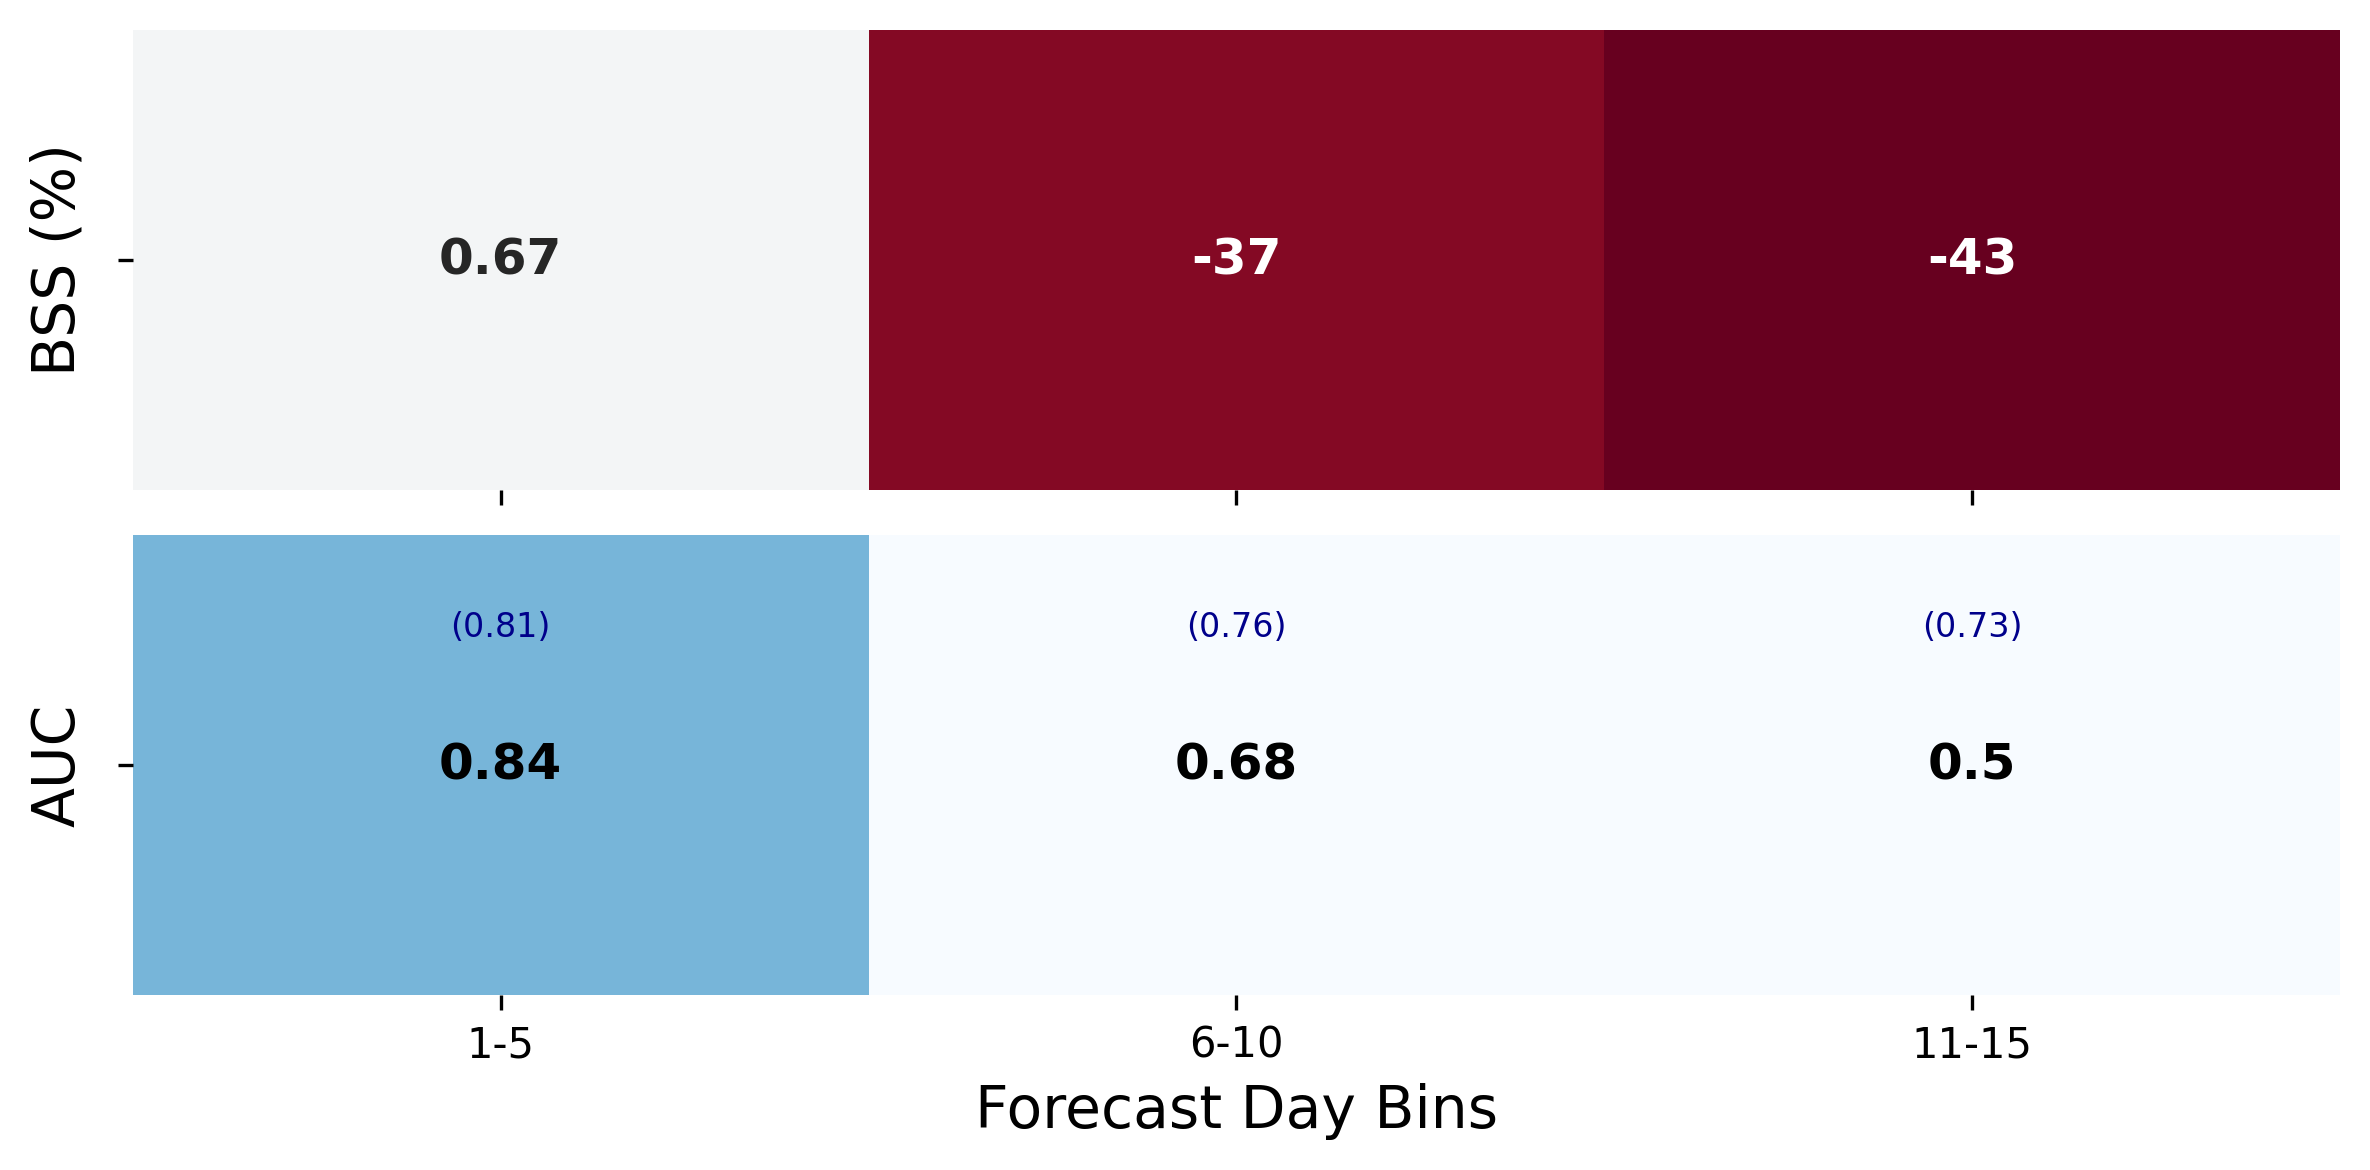

In [13]:
# Load image from file
fig_filename = os.path.join(dir_fig, f'skill_scores_heatmap_{model_name}_{tuple_to_str(window)}.png')
# img = mpimg.imread(fig_filename)  
# plt.figure(figsize=(4, 3))
# plt.imshow(img)
display(Image(filename=fig_filename, width=390))

<br>

Brier Skill Score (BSS) measures the relative improvement of a forecast compared to a reference forecast (climatology in this example)  

Think of the BSS as a percentage of improvement over "guessing" based on historical averages.

| Score | Meaning |
| :--- | :--- |
|1.0 | Perfect Forecast. You nailed the probability and the outcome every single time.
|> 0	|Skilled. You are performing better than the reference (climatology). The closer to 1, the better.
|0	|No Skill. You might as well have just looked up the historical average for that day; your model added zero value.
|< 0	|Worse than useless. Your forecast is actually performing worse than a simple long-term average. Time to recalibrate!   

<br>

Area Under the ROC (Receiver Operating Characteristic) Curve (AUC plots the Hit Rate (True Positive Rate) against the False Alarm Rate (False Positive Rate) for every possible probability threshold (0% to 100%). It tells you the probability that a randomly chosen "event" day was assigned a higher forecast probability than a randomly chosen "non-event" day.  

| AUC Value | Interpretation | Operational Reality |
| :--- | :--- | :--- |
| **1.0** | **Perfect Discrimination** | The "Golden Ticket." The model never ranks a dry day higher than a wet day. |
| **0.8 – 0.9** | **Excellent** | Very useful for automated alerts. High confidence in the model's "signal." |
| **0.7 – 0.8** | **Good/Fair** | Useful for general forecasting, but requires human oversight to filter noise. |
| **0.5** | **No Skill** | The model is effectively "guessing." It has zero ability to distinguish a storm from a clear sky. |
| **< 0.5** | **Worst than Random** | The model is consistently backward (e.g., it gives higher probabilities to dry days). |

<br>

<br>

if `plot_reliability` is set to `True`, it generates a reliability diagram

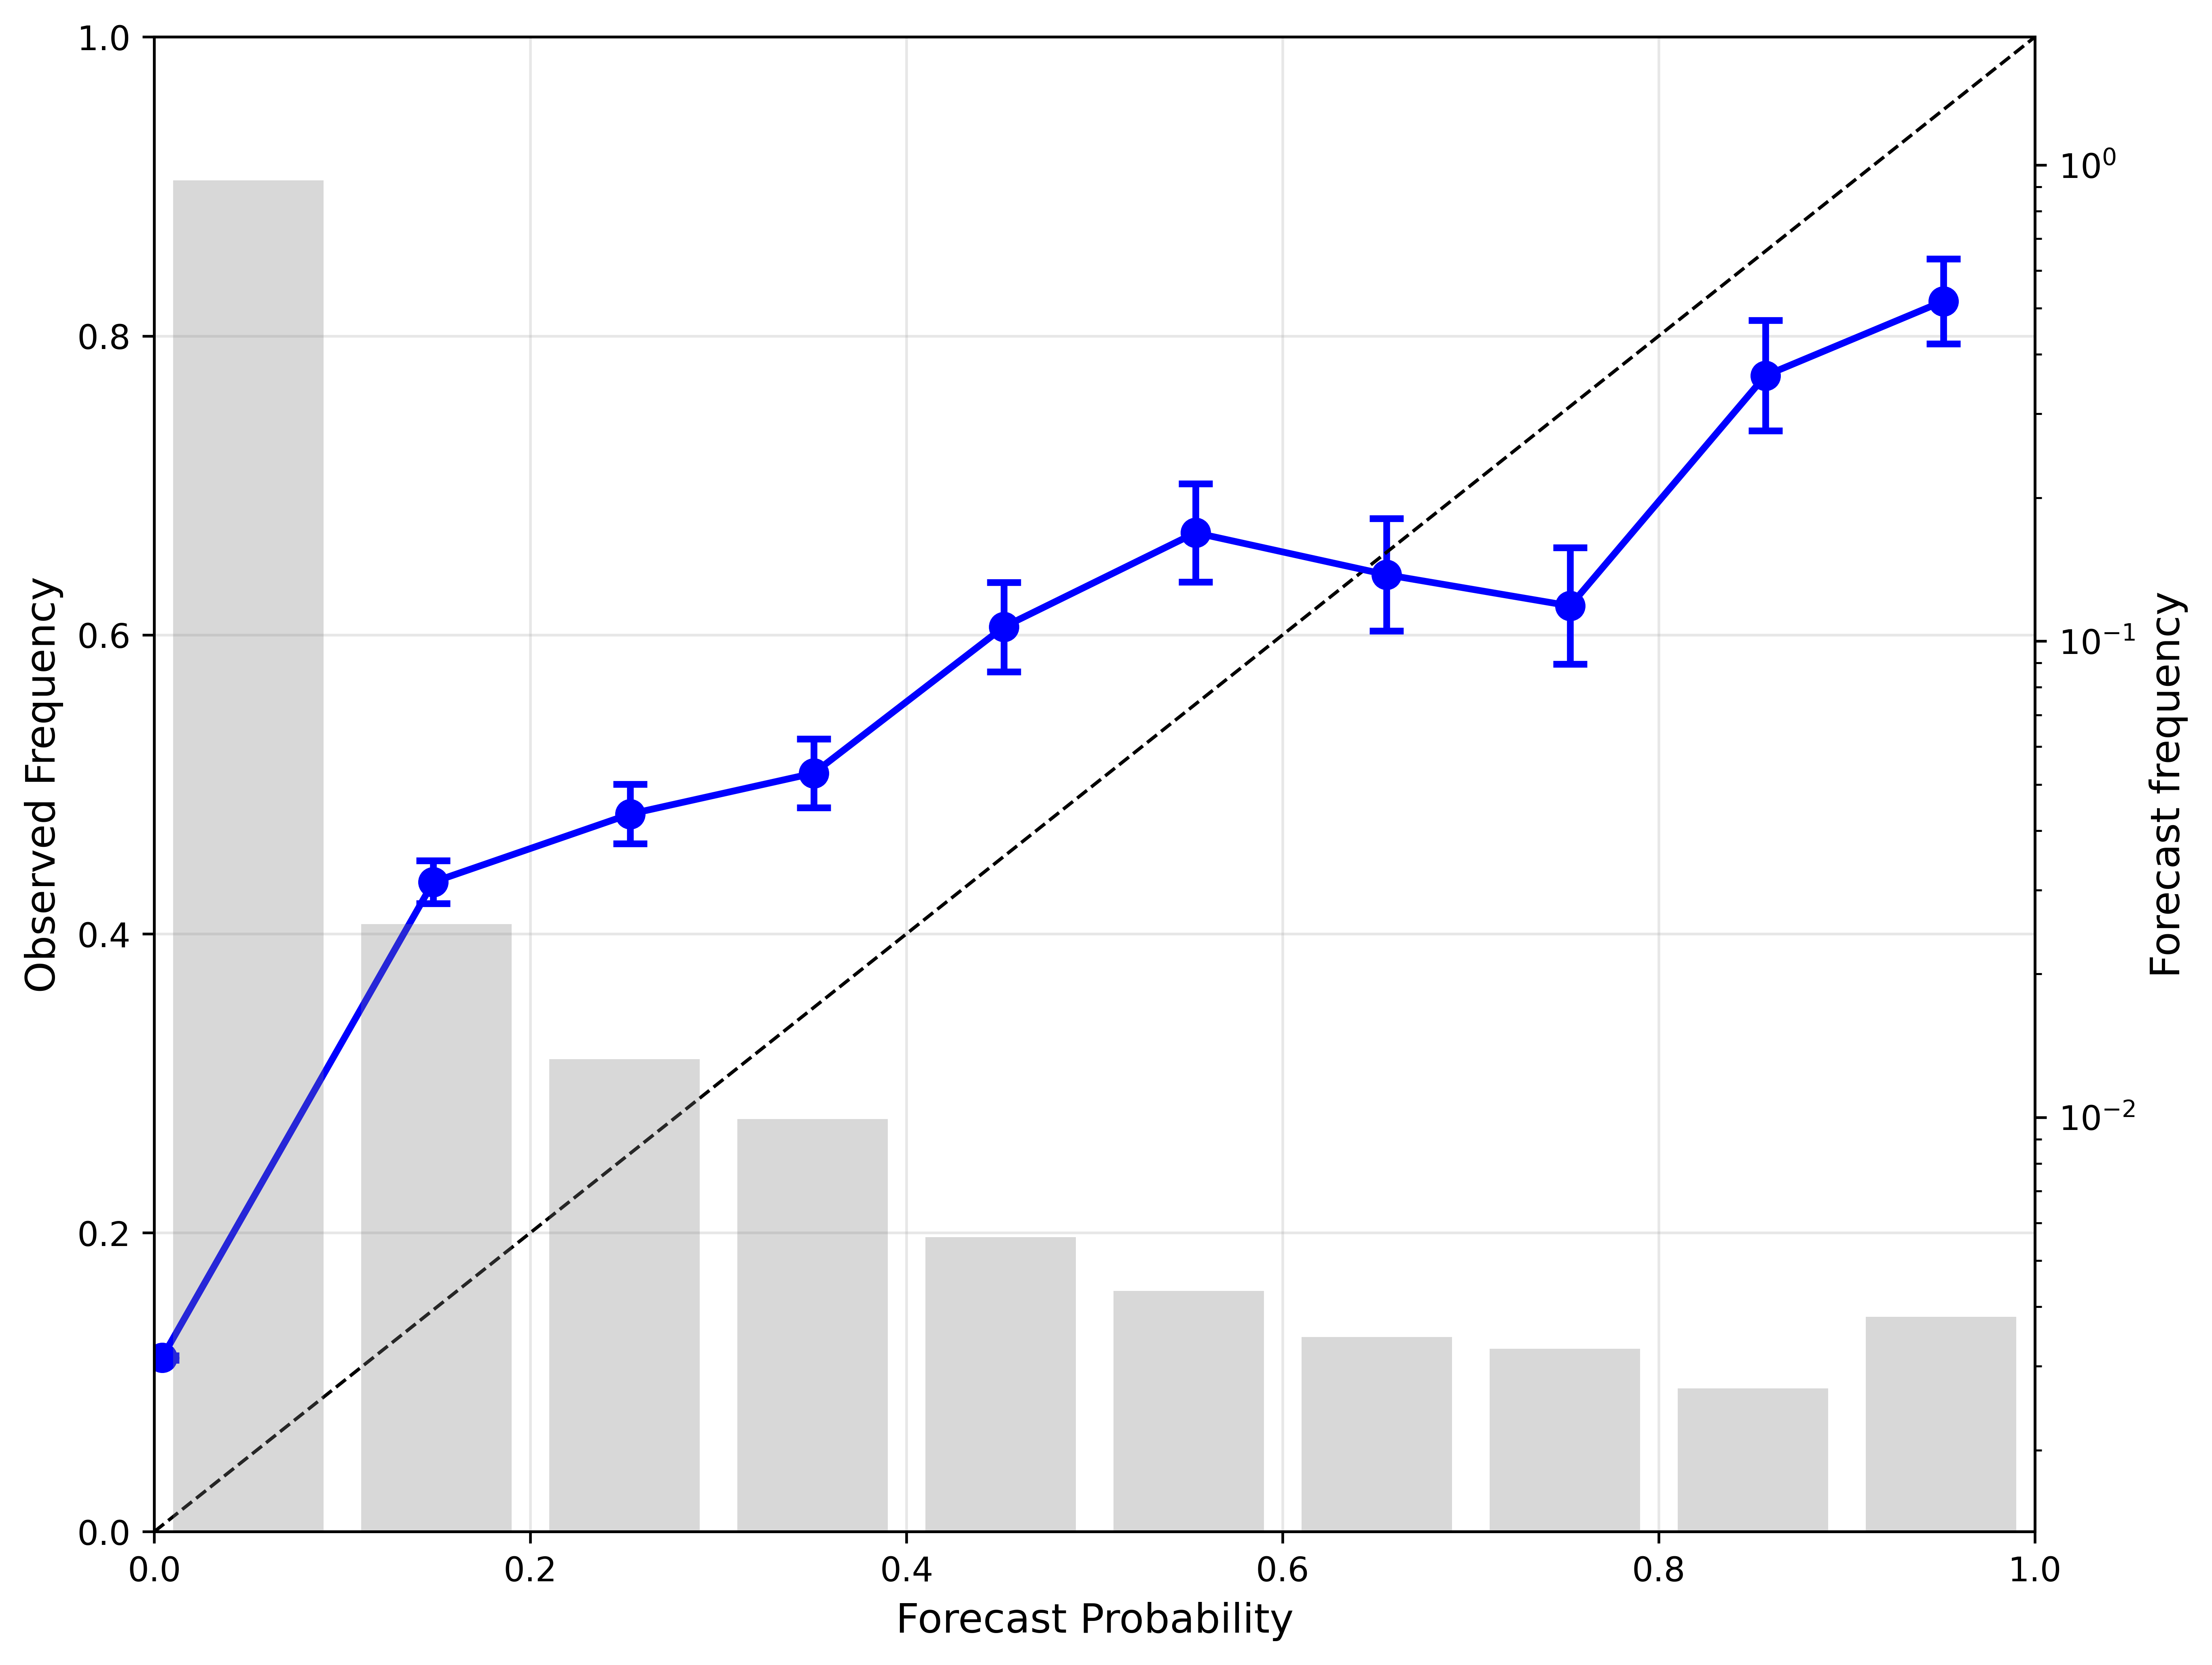

In [15]:
fig_filename = os.path.join(dir_fig, f'reliability_{model_name}_{tuple_to_str(window)}.png')
display(Image(filename=fig_filename, width=390))

<br>

Reliability Diagram (also called an Attributes Diagram)is the "detailed feedback" that tells you exactly where a probabilistic model is failing or succeeding.  

The Diagonal (Dashed Line)represents Perfect Reliability. Along this line, the forecast probability exactly matches the observed frequency (e.g., when the model says "20%," it actually happens 20% of the time).  

The Blue Line (Reliability Curve) shows how your model actually performed.  

Error Bars represent the confidence interval (usually 95%). If the sample size in a specific probability bin is small, the error bars will be larger, meaning the data point is less statistically significant.

The Grey Bars (Refinement/Sharpness) is a histogram showing how often the model issued a specific probability.

Operationally: We want a "U-shaped" histogram (lots of 0% and 100% forecasts). If all the bars are in the middle (near climatology), the model is "unconfident."

| Position of Blue Line | Statistical Term | Operational Meaning |
| :--- | :--- | :--- |
| **Above the Diagonal** | **Under-forecasting** | The model is too "conservative." When it predicts 20%, the event happens 40% of the time. You should trust the model *more* than it suggests. |
| **Below the Diagonal** | **Over-forecasting** | The model is "crying wolf." When it predicts 80%, the event only happens 60% of the time. You should "dampen" its enthusiasm. |
| **Flatter than Diagonal** | **Over-confident** | The model moves toward 0% and 100% too aggressively, but reality stays closer to the middle. |
| **Steeper than Diagonal** | **Under-confident** | The model stays near the average, but reality is more extreme. |

<br>

<br>

if  `plot_bar_bss_rpss_auc` is set to `True`, it generates a bar plot for metrics BSS, RPSS and AUC 

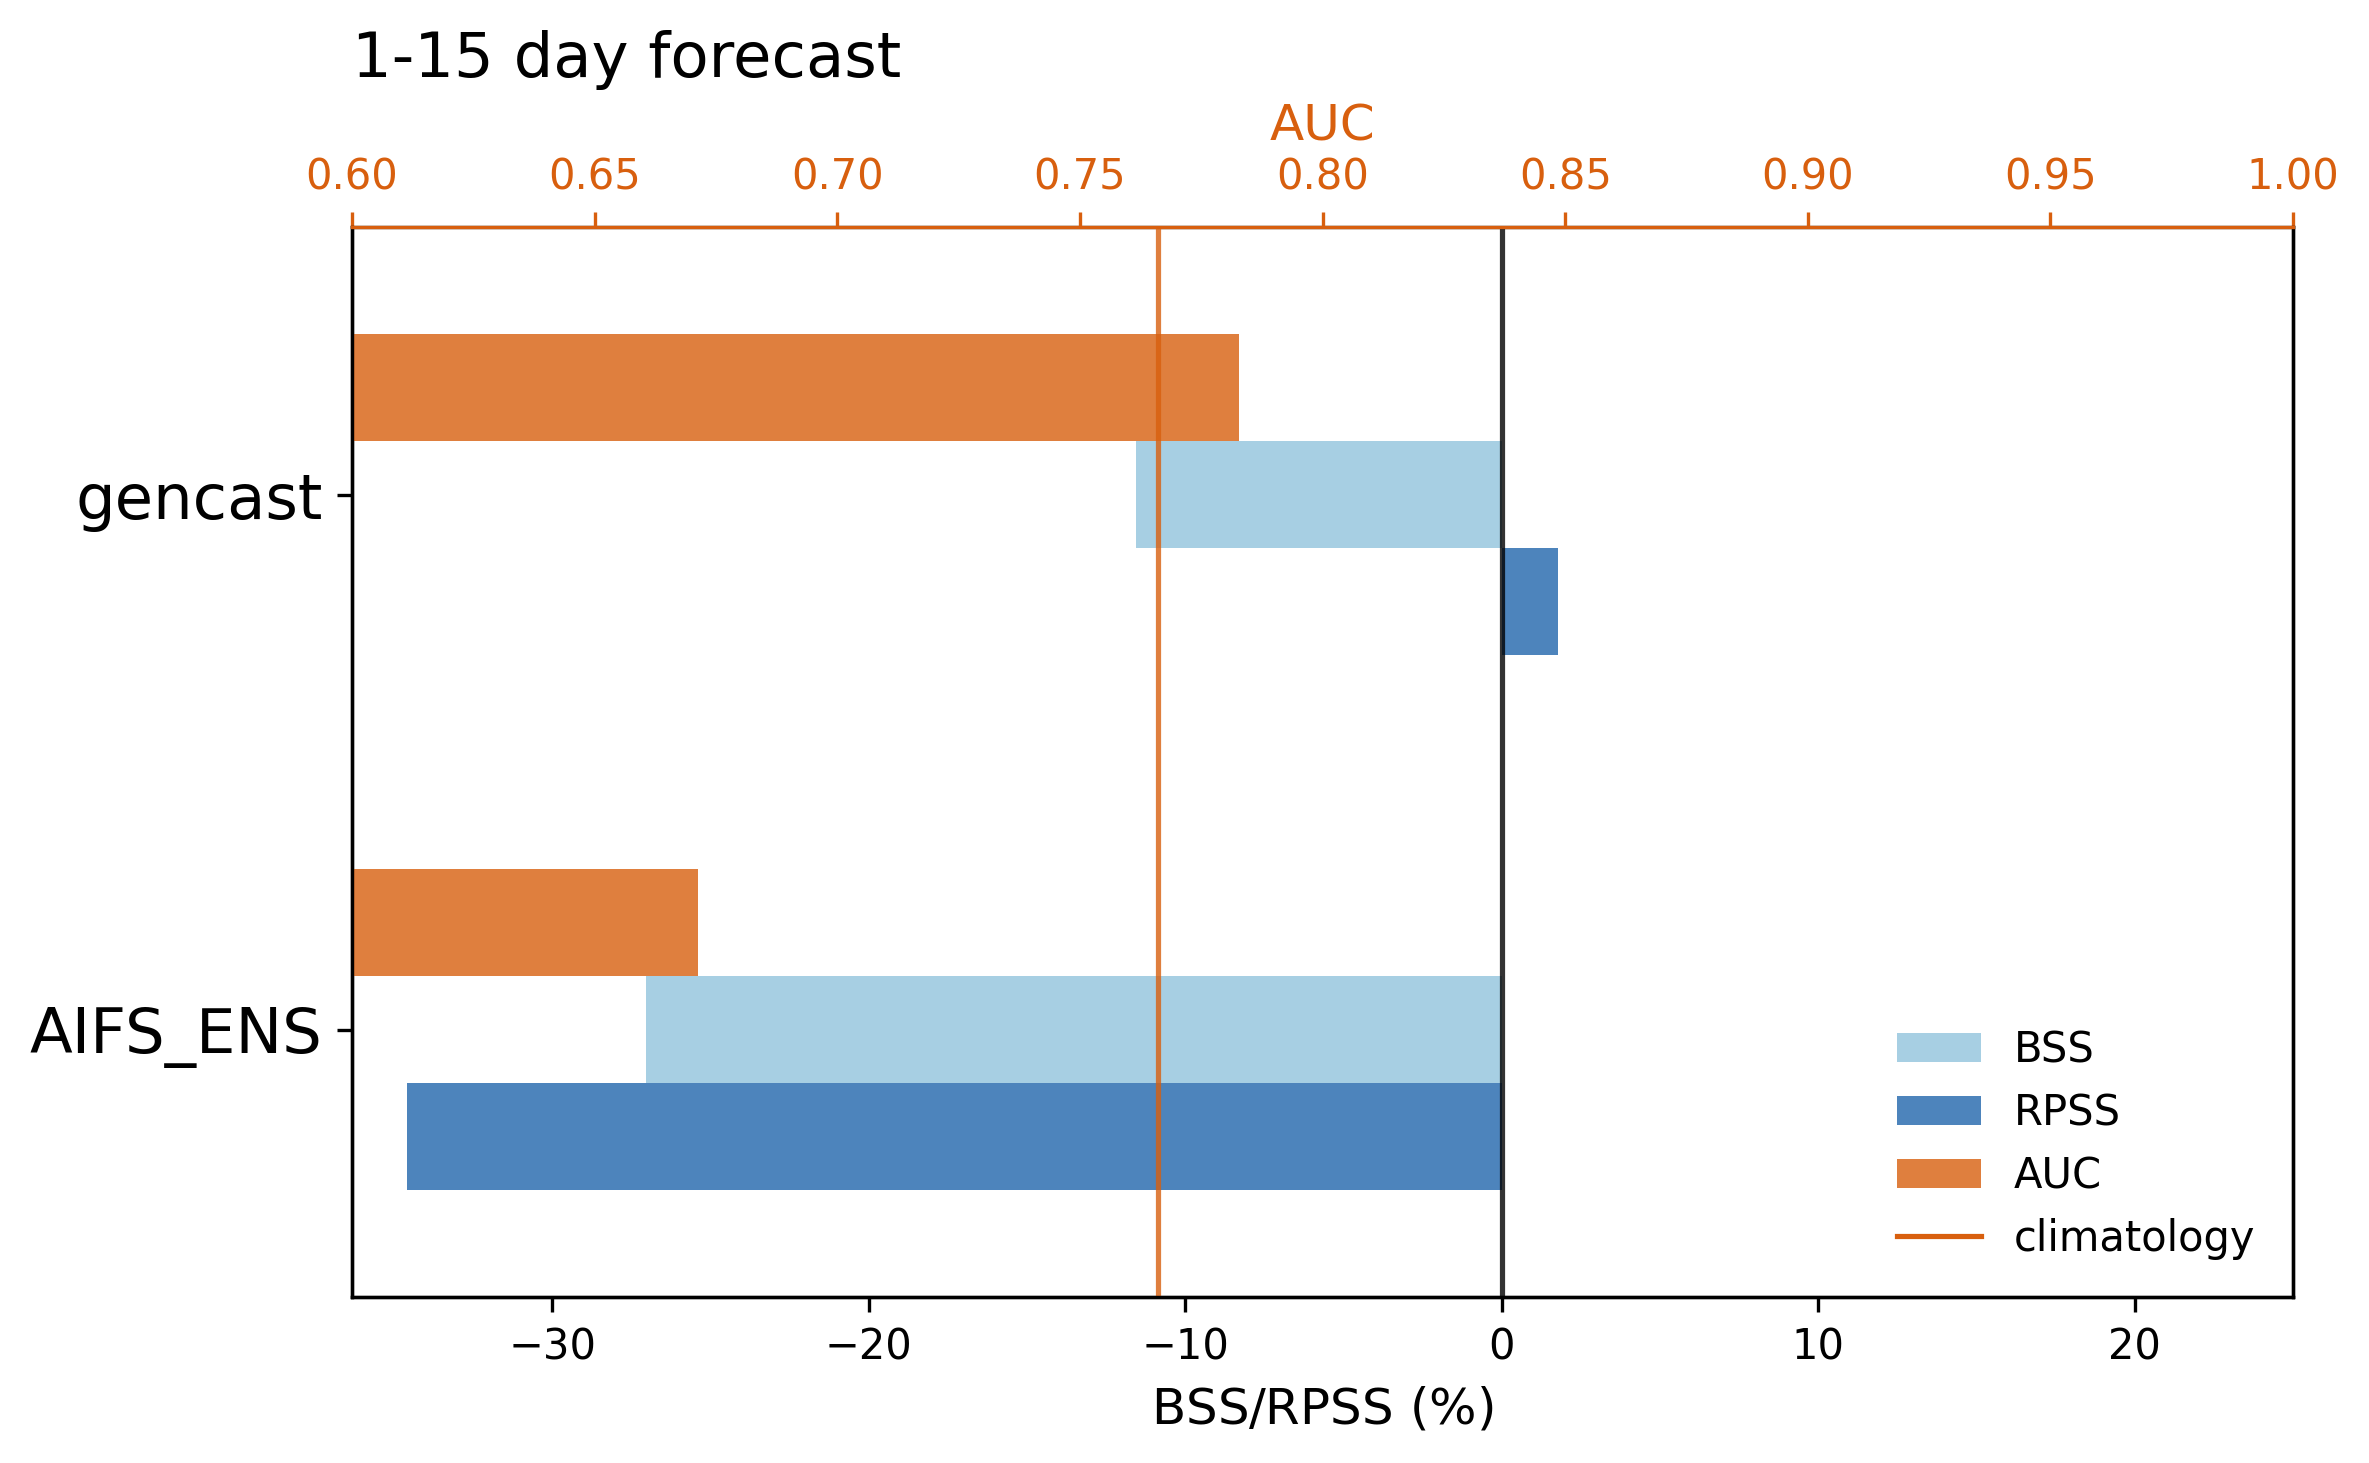

In [16]:
fig_filename = os.path.join(dir_fig, f'panel_bar_BSS_RPSS_AUC_{tuple_to_str(window)}.png')
display(Image(filename=fig_filename, width=450))

<br>
<br>

RPSS (Ranked Probability Skill Score) is the grade for a "How Much/What Level" forecast. It is the industry standard for verifying multi-category probabilistic forecasts, such as seasonal outlooks (Below Normal, Near Normal, Above Normal) or rain intensity bins. RPSS cares about the distance between your prediction and reality.   

| RPSS Value | Interpretation | Operational Meaning |
| :--- | :--- | :--- |
| **1.0** | **Perfect Forecast** | You assigned 100% probability to the correct category every single time. |
| **> 0** | **Skilled** | Your model is "smarter" than just using the historical climate average. |
| **0** | **No Skill** | Your model is performing exactly as well as a "blind" climatology forecast. |
| **< 0** | **Worse than Climatology** | Your model is actively misleading; the historical average is a better guide. |

<br>

<br>

if `plot_panel_heatmap_skill` set to `True`, it generates a heatmap of skill scores across models and forecast bins. it shows how forecast skill vary across different models, and different lead time.  


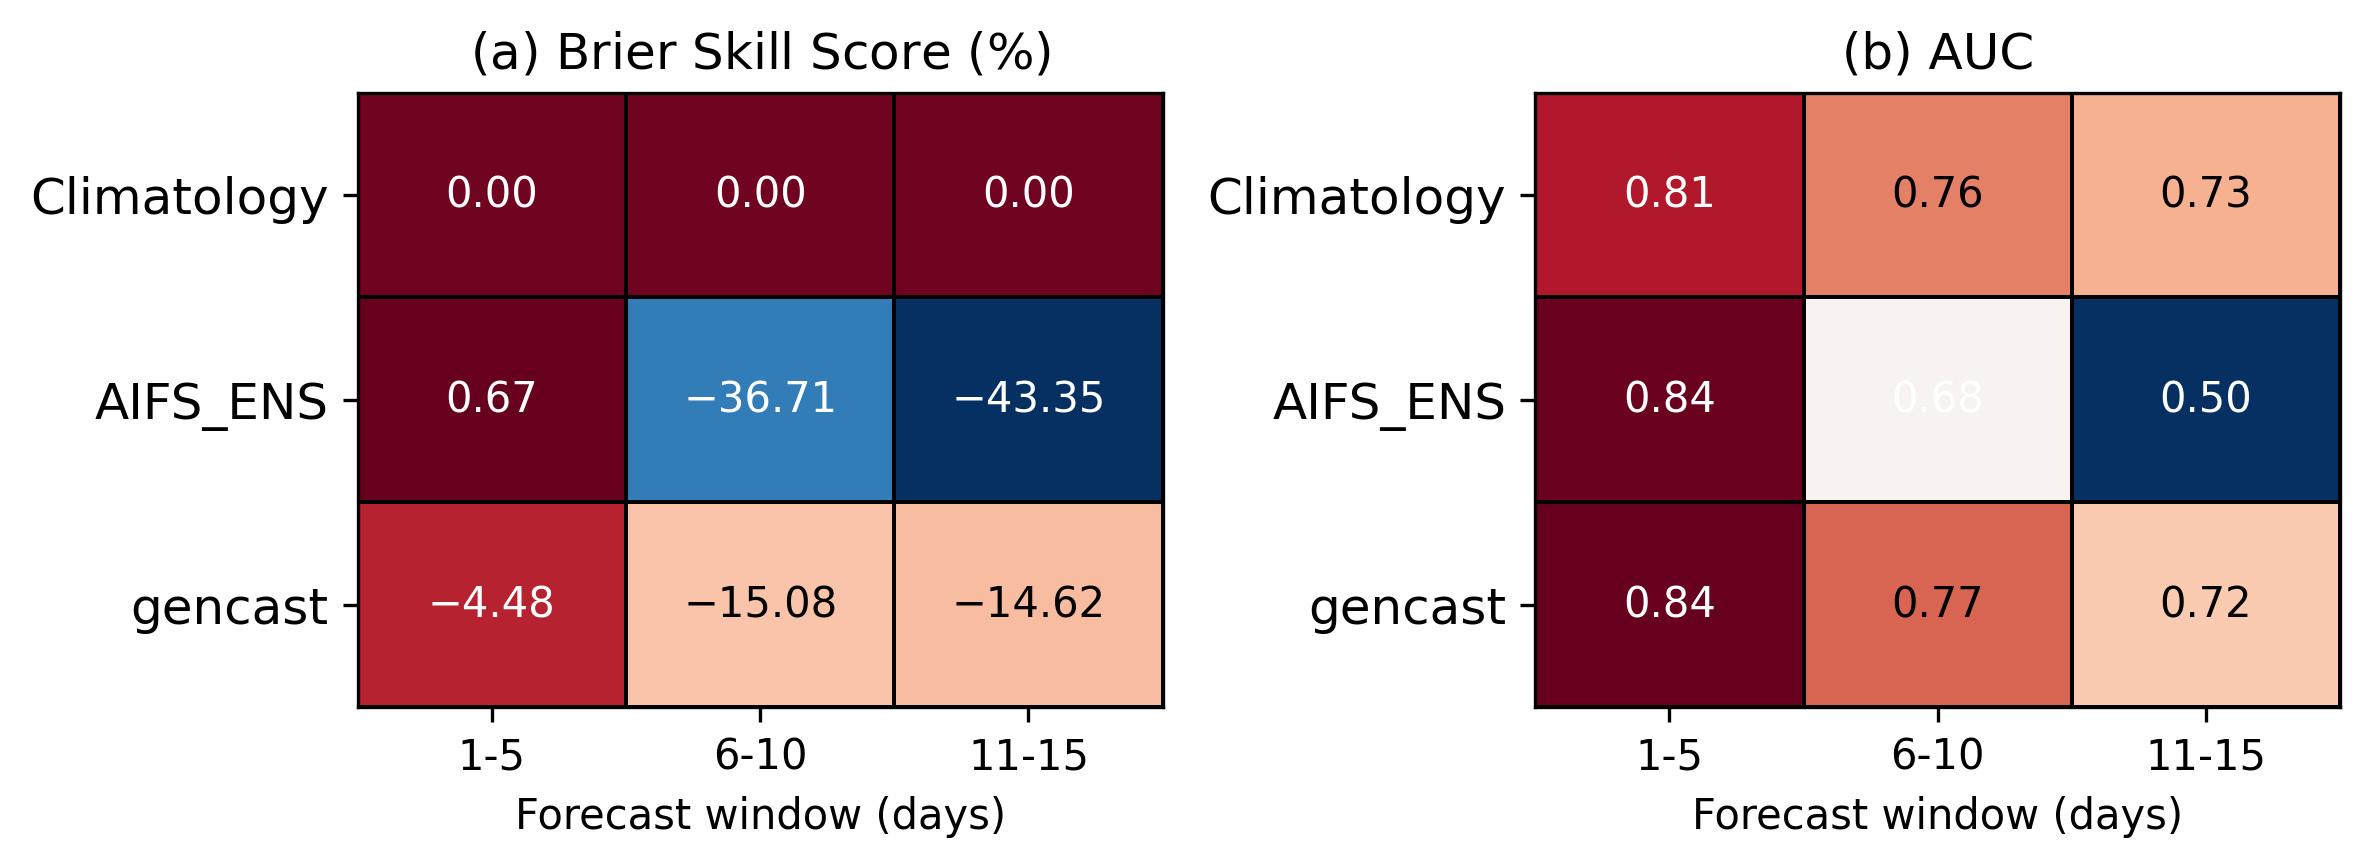

In [18]:
# fig_filename = base_dir.joinpath(dir_fig, f'panel_portrait_BSS_AUC_{tuple_to_str(window)}.png')
fig_filename = os.path.join(dir_fig, f'panel_portrait_BSS_AUC_{tuple_to_str(window)}.png')
display(Image(filename=fig_filename, width=550))

<br>
<br>

For deterministic forecast, spatial metrics MAE, FAR, MR are saved in netcdf files

In [45]:
filename = os.path.join(dir_out, f"spatial_metrics_{model_name}_{tuple_to_str(window)}.nc")
ds = xr.open_dataset(filename)
print("\n loading saved metrics from ", filename)
ds


 loading saved metrics from  ../demo/output/spatial_metrics_IFS_1-15.nc


<xarray.Dataset> Size: 1kB
Dimensions:           (lat: 7, lon: 5)
Coordinates:
  * lat               (lat) float64 56B 8.0 12.0 16.0 20.0 24.0 28.0 32.0
  * lon               (lon) float64 40B 72.0 76.0 80.0 84.0 88.0
Data variables:
    false_alarm_rate  (lat, lon) float64 280B ...
    miss_rate         (lat, lon) float64 280B ...
    mean_mae          (lat, lon) float64 280B ...
    mae_2015          (lat, lon) float64 280B ...
Attributes:
    model:                IFS
    years:                2015
    tolerance_days:       3
    verification_window:  1,15
    max_forecast_day:     15
    mok:                  None
    title:                Monsoon Onset MAE, FAR, MR Analysis
    description:          Spatial maps of Mean Absolute Error, False Alarm Ra...

<br>

an example of spatial error metrics plot

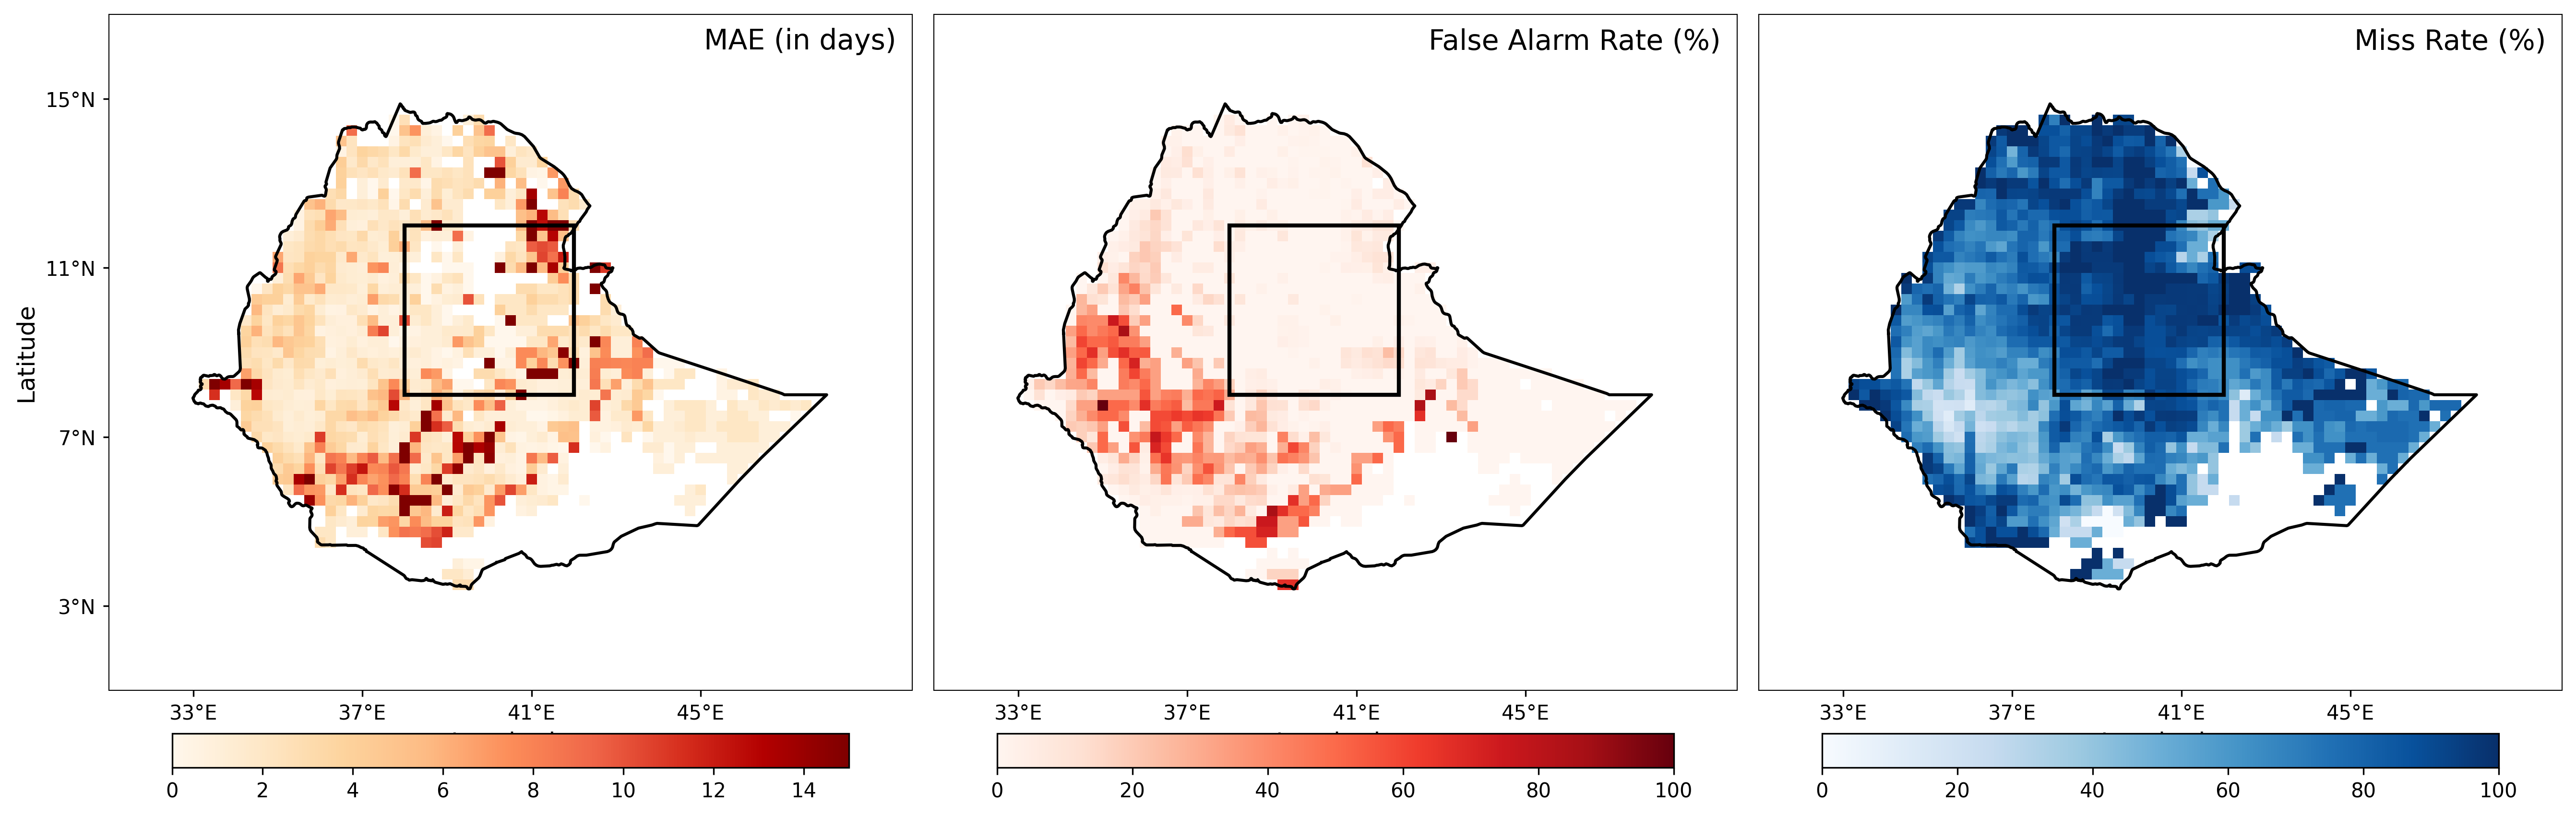

In [20]:
# fig_filename = base_dir.joinpath(dir_out, f'spatial_metrics_{model_name}_{"-".join(map(str, window))}.png')
fig_filename = os.path.join(dir_fig, f"spatial_metrics_{model_name}_{tuple_to_str(window)}.png")
display(Image(filename=fig_filename, width=800))

<br>

In operational meteorology, these False Alarm Rate and Miss Rate are the "balancing act" of any forecast. They are derived from the Contingency Table (a 2x2 matrix of Hits, Misses, False Alarms, and True Negatives).   

Miss Rate (The "Asleep at the Wheel" Metric) is the proportion of actual events that were not forecasted. It is the mathematical complement of the Hit Rate (Probability of Detection). Operational Meaning: If your Miss Rate is 0.20, you missed 20% of the onset that actually happened.  

False Alarm Rate (The "Crying Wolf" Metric) measures how often you forecast an event for days when nothing actually happens, relative to all the "quiet" days. Operational Meaning: It represents the probability that a "No" event will be incorrectly forecasted as a "Yes."   

The Operational Trade-off: There is a fundamental "tug-of-war" between these two. If you want a 0% Miss Rate, you could simply forecast "Rain" every single day. You would never miss a storm, but your False Alarm Rate would skyrocket. Conversely, if you want a 0% False Alarm Rate, you could never issue a warning at all. You'd never be wrong about a "Yes" forecast, but your Miss Rate would be 100%. Operational forecasting is the art of finding the "Sweet Spot" between these two extremes.  

| Metric | Goal | Operational Consequence of a High Score |
| :--- | :--- | :--- |
| **Miss Rate** | **0.0** | **Public Danger:** People are unwarned for a major event (e.g., a tornado with no siren). |
| **False Alarm Rate** | **0.0** | **Loss of Trust:** "The Boy Who Cried Wolf" effect. People ignore warnings because "it never happens anyway." |

<br>

